Coordinate system already present. Adding new coordinate system, which will replace the existing one.



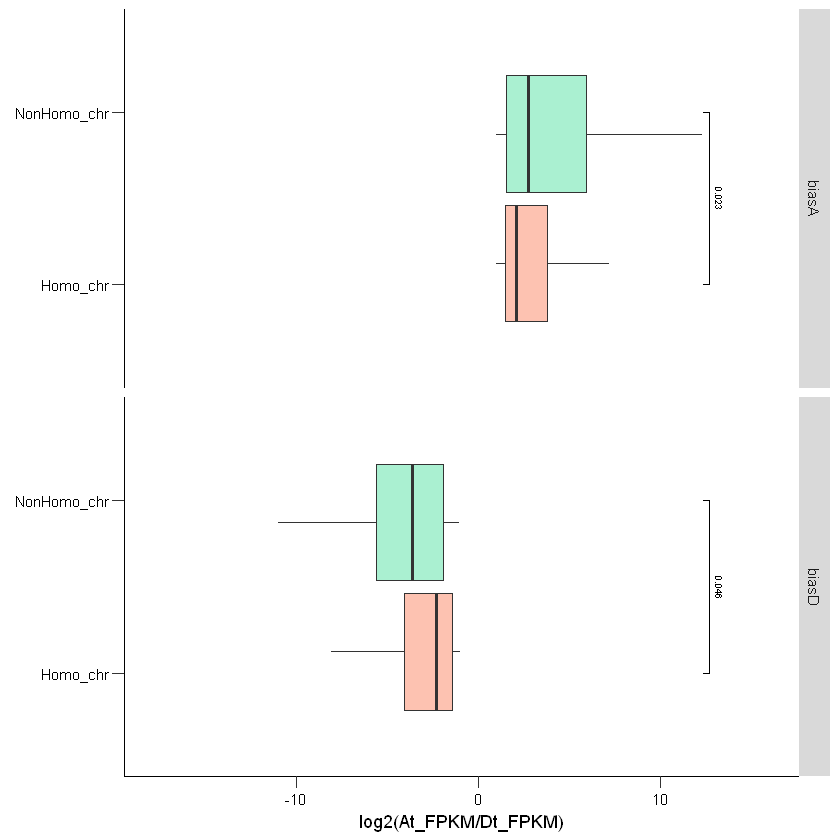

In [24]:
## 同源基因表达差异，染色体内和染色体间的比较
##比较J85和J98网络中保守的和动态的基因表达量
rm(list = ls())
setwd('F:/TM-1_leaf_3D-genome/RNA_Seq/bias/loop/')
library(ggplot2)
library(ggpubr)
compaired <- list(c('Homo_chr','NonHomo_chr'))
df <- read.csv('gene_loop_bias_tags.txt', sep = '\t', header = T)
fg <- ggplot(df, aes(x=tags, y=log2FC, fill=tags))+
geom_boxplot(outlier.colour = NA, notch=FALSE, width=1.5)+
labs(x=NULL, y='log2(At_FPKM/Dt_FPKM)')+
facet_grid(Bias~.)+
coord_cartesian(ylim = c(-11, 13)) +
theme(panel.background = element_blank(), 
     panel.grid = element_blank(),
     axis.line=element_line(linetype=1,color="black"),
     legend.position='none',
     axis.ticks.length = unit(0.25, 'cm'),
     axis.text = element_text(color='black'),
     #axis.text.x = element_text(angle = 315, hjust = 0),
     )+
geom_signif(comparisons = compaired, step_increase = 0.05,test =t.test, tip_length=0.01,  y_position=c(11), textsize = 2)+
scale_fill_manual(values=c('#FDC2B1', "#AAF0D1"))+
coord_flip()
fg
ggsave(plot =fg, filename = 'gene_loop_bias_tags.pdf', height =2, width = 3)

[1] "inactive"      "active"        "atac_inactive" "atac_active"

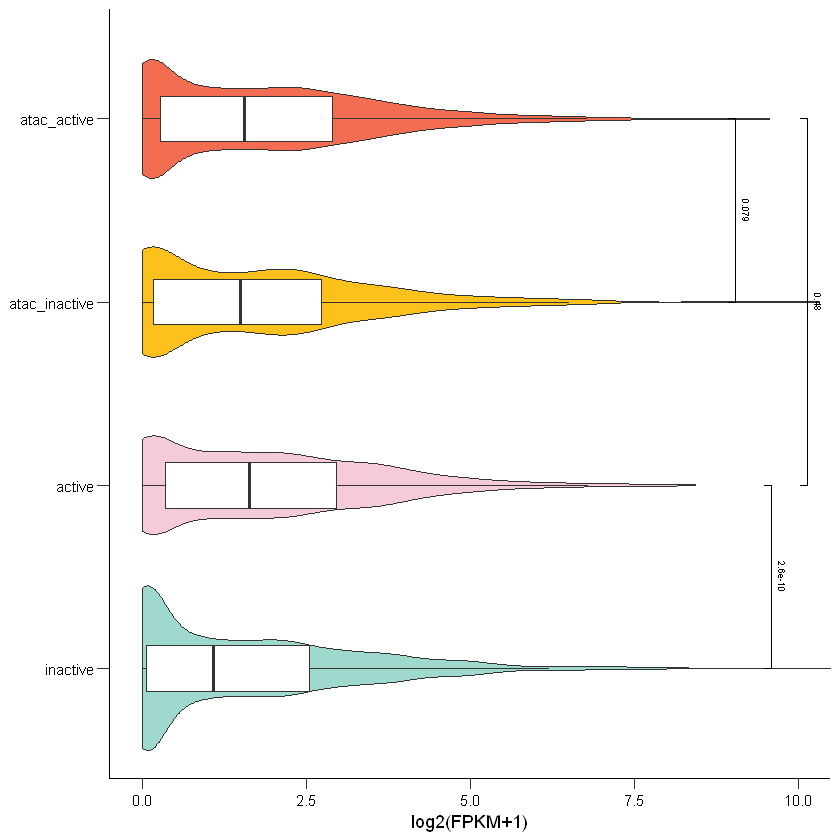

In [36]:
## 分析不同的非基因区域的修饰对于基因表达的影响
rm(list = ls())
setwd('F:/TM-1_leaf_3D-genome/ChIP/peaks')
library(ggplot2)
library(ggpubr)
compaired <- list(c('atac_active','atac_inactive'), c("active", "inactive"), c('atac_active', 'active'), c('atac_inactive', 'inactive'))
df <- read.csv('gene_enhancer_regulation_promoter_2k.txt', sep = '\t', header = T)
#df <- within(df, tags <- factor(tags, levels = c("atac_active", "atac_inactive", "active", "inactive")))
df <- within(df, tags <- factor(tags, levels = c("inactive", "active", "atac_inactive", "atac_active")))
with(df, levels(tags))
#df
fg <- ggplot(df, aes(x=tags, y=log2(fpkm+1), fill=tags))+
geom_violin()+
geom_boxplot(outlier.colour = NA, notch=FALSE, width=0.25, fill='white')+
labs(x=NULL, y='log2(FPKM+1)')+
#facet_grid(Bias~.)+
#coord_cartesian(ylim = c(0, 10)) +
theme(panel.background = element_blank(), 
     panel.grid = element_blank(),
     axis.line=element_line(linetype=1,color="black"),
     legend.position='none',
     axis.ticks.length = unit(0.25, 'cm'),
     axis.text = element_text(color='black'),
     #axis.text.x = element_text(angle = 315, hjust = 0)
     )+
geom_signif(comparisons = compaired, step_increase = 0.05,test =wilcox.test, tip_length=0.01,  y_position=c(8.5), textsize = 2)+
#scale_fill_manual(values=c('#F36D52','#FCC11D','#F5CBD9', "#9FD9CD"))+
scale_fill_manual(values=c("#9FD9CD", '#F5CBD9', '#FCC11D', '#F36D52'))+
coord_flip(ylim = c(0, 10))
fg
ggsave(plot =fg, filename = 'gene_enhancer_regulation_promoter_2k.pdf', height =2, width = 3)

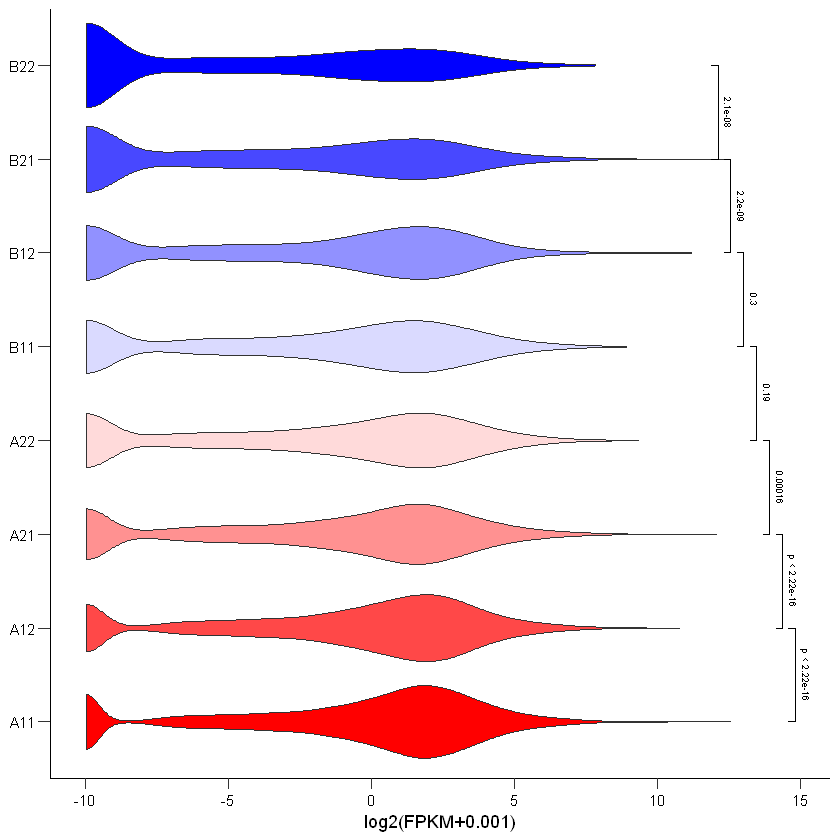

: 

In [1]:
###分析subcompartment所包含基因的表达水平
rm(list = ls())
#setwd('F:/TM-1_leaf_3D-genome/HiC/cpt/CALDER/40K')
setwd('F:/TM-1_leaf_3D-genome/HiC/cpt/CALDER/20K')
library(ggplot2)
library(ggpubr)
compaired <- list( c('B21', 'B22'),  c('B12', 'B21'), c('B11', 'B12'), c('A22', 'B11'), c('A21', 'A22'), c('A12','A21'), c('A11','A12'))
#df <- read.csv('TM1_40K_gene_scpt.txt', sep = '\t', header = T)
df <- read.csv('TM1_20K_gene_scpt.txt', sep = '\t', header = T)
df_need <- df[df$tags!='no_tags', ]
fg <- ggplot(df_need, aes(x=tags, y=log2(level+0.001), fill=tags))+
geom_violin()+
#geom_boxplot(outlier.colour = NA, notch=FALSE)+
labs(x=NULL, y='log2(FPKM+0.001)')+
#facet_grid(Bias~.)+
#coord_cartesian(ylim = c(-11, 13)) +
theme(panel.background = element_blank(), 
     panel.grid = element_blank(),
     axis.line=element_line(linetype=1,color="black"),
     legend.position='none',
     axis.ticks.length = unit(0.25, 'cm'),
     axis.text = element_text(color='black')
     #axis.text.x = element_text(angle = 315, hjust = 0),
     )+
geom_signif(comparisons = compaired, step_increase = 0.02,test =wilcox.test, tip_length=0.01,  y_position=c(11), textsize = 2)+
scale_fill_manual(values=c("#FF0000","#FF4848","#FF9191","#FFDADA","#DADAFF","#9191FF","#4848FF","#0000FF", "#FF0007"))+
coord_flip()

fg
ggsave(plot =fg, filename = 'TM1_40K_gene_scpt.pdf', height =3, width = 3)

In [14]:
###分析subcompartment所包含基因的表达水平
rm(list = ls())
#setwd('F:/TM-1_leaf_3D-genome/HiC/cpt/CALDER/40K')
#setwd('F:/TM-1_leaf_3D-genome/Proe-C_HiC/TAD/Cliques/method2')
library(ggplot2)
df <- read.csv('test', sep = '\t', header = T)
fg <- ggplot(df, aes(x=tag, y=test/1000))+
#geom_violin()+
coord_cartesian(ylim = c(0, 500)) +
geom_boxplot(outlier.colour = NA, notch=FALSE)+
labs(x=NULL, y='log2(FPKM+0.001)')+
#facet_grid(Bias~.)+
#coord_cartesian(ylim = c(-11, 13)) +
theme(panel.background = element_blank(), 
     panel.grid = element_blank(),
     axis.line=element_line(linetype=1,color="black"),
     legend.position='none',
     axis.ticks.length = unit(0.25, 'cm'),
     axis.text = element_text(color='black')
     #axis.text.x = element_text(angle = 315, hjust = 0),
     )+
     
fg


Warning message in file(file, "rt"):
"无法打开文件'test': No such file or directory"


ERROR: Error in file(file, "rt"): 无法打开链结


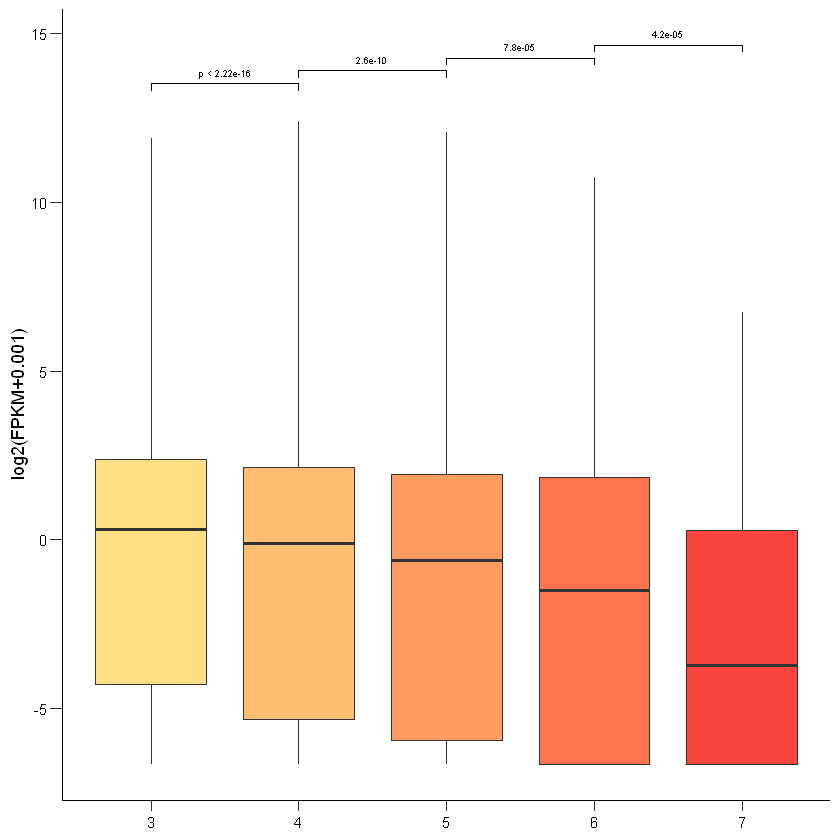

In [20]:
## 分析TAD cliques 所包含的基因表达量
rm(list = ls())
setwd('F:/TM-1_leaf_3D-genome/HiC/TAD/Cliques/method2')
library(ggplot2)
library(ggpubr)
df <- read.csv('all_TAD_cliques_gene_fpkm.txt', sep = '\t', header = T)
df_need <- df[df$cliques>2,]
compaired <- list(c('3', '4'),  c('4', '5'), c('5', '6'), c('6', '7'))
fg <- ggplot(df_need, aes(x=as.factor(cliques), y=log2(FPKM+0.01), fill=cliques))+
geom_boxplot(outlier.colour = NA, notch=FALSE)+
labs(x=NULL, y='log2(FPKM+0.001)')+
theme(panel.background = element_blank(), 
     panel.grid = element_blank(),
     axis.line=element_line(linetype=1),
     legend.position='none',
     axis.ticks.length = unit(0.25, 'cm'),
     axis.text = element_text(color='black')
     ) + 
     scale_fill_gradient(low = "#FFDE86",high = "#FA453E")+
     geom_signif(comparisons = compaired, step_increase = 0.02,test =wilcox.test, tip_length=0.01, textsize = 2)
fg
ggsave(plot =fg, filename = 'all_TAD_cliques_gene_fpkm.pdf', height =3.5, width = 3)

[1] "3.0"  "4.0"  "5.0"  "6.0"  "7.0"  "8.0"  "9.0"  "10.0" "11.0" "12.0"
[11] "13.0" "14.0" "15.0" "16.0" "17.0" "18.0" "19.0" "20.0" "21.0" "22.0"
[21] ">22"

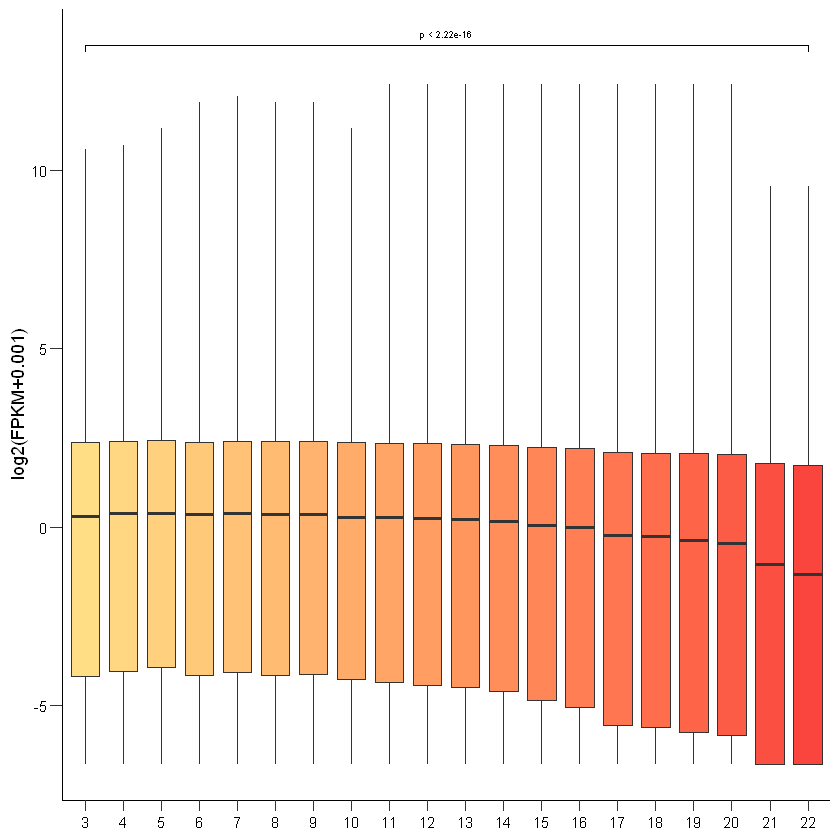

In [14]:
## 分析TAD cliques 所包含的基因表达量
rm(list = ls())
setwd('F:/TM-1_leaf_3D-genome/Pore-C/TAD/TAD_cliques/chr')
library(ggplot2)
library(ggpubr)
df <- read.csv('PoreC_cliques_gene.txt', sep = '\t', header = T)
#df_need <- df[df$cliques>2&df$cliques<23,]
df_need <- df[df$cliques>2&df$cliques<23,]
compaired <- list(c('3', '22'))
df_need <- within(df_need, cliques2 <- factor(cliques2, levels = c('3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '16.0', '17.0', '18.0', '19.0', '20.0', '21.0', '22.0', '>22')))
with(df_need, levels(cliques2))
fg <- ggplot(df_need, aes(x=as.factor(cliques), y=log2(FPKM+0.01), fill=cliques))+
geom_boxplot(outlier.colour = NA, notch=FALSE)+
labs(x=NULL, y='log2(FPKM+0.01)')+
theme(panel.background = element_blank(), 
     panel.grid = element_blank(),
     axis.line=element_line(linetype=1),
     legend.position='none',
     axis.ticks.length = unit(0.25, 'cm'),
     axis.text = element_text(color='black')
     ) + 
     scale_fill_gradient(low = "#FFDE86",high = "#FA453E")+
     geom_signif(comparisons = compaired, step_increase = 0.02,test =wilcox.test, tip_length=0.01, textsize = 2)
fg
ggsave(plot =fg, filename = 'PoreC_cliques_gene.pdf', height =3.5, width = 3.5)

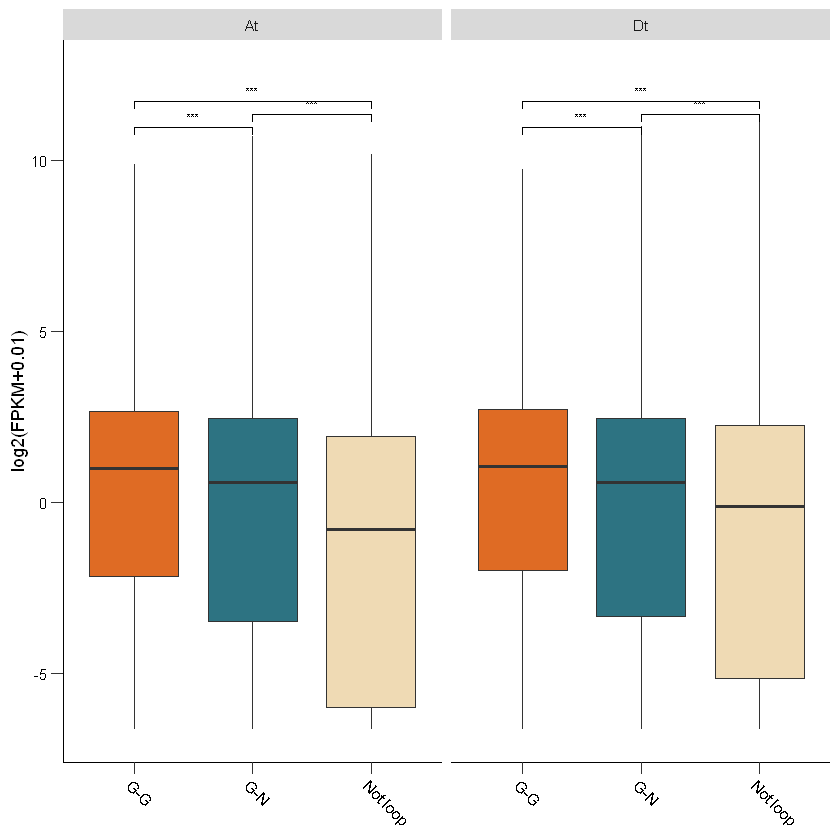

In [13]:
## 分析不同类型的loop对于基因表达的影响
rm(list = ls())
setwd("F:/TM-1_leaf_3D-genome/HiC/loop/gene_loop/GG-GN")
library(ggplot2)
library(ggpubr)
df <- read.csv("gene_loop_tag.txt", sep = "\t", header = T)
compaired <- list(c("G-G", "G-N"), c("G-N", "Not loop"), c("G-G", "Not loop"))
# df <- within(df, sig <- factor(sig, levels = c("Not loop", "G-N", "G-G")))
# with(df, levels(sig))
#fg <- ggplot(df, aes(x = log2(FPKM + 0.01), y = sig, fill = sig)) +
fg <- ggplot(df, aes(x = sig, y = log2(FPKM + 0.01), fill = sig)) +
geom_boxplot(outlier.colour = NA, notch = FALSE) +
facet_grid(.~subg) +
labs(y = "log2(FPKM+0.01)", x = NULL) +
theme(panel.background = element_blank(),
     panel.grid = element_blank(),
     axis.line = element_line(linetype = 1),
     legend.position = "none",
     axis.ticks.length = unit(0.25, "cm"),
     axis.text = element_text(color = "black"),
     axis.text.x = element_text(angle = 315, hjust=0)
     ) +
     scale_fill_manual(values = c("#df6b24", "#2d7382", "#efdab4")) +
     geom_signif(comparisons = compaired, step_increase = 0.02,test =wilcox.test, tip_length=0.01, textsize = 2, y_position=10, annotations=c("***", "***", "***"))
fg
ggsave(plot =fg, filename = 'gene_loop_tag.pdf', height =4, width = 3.5)

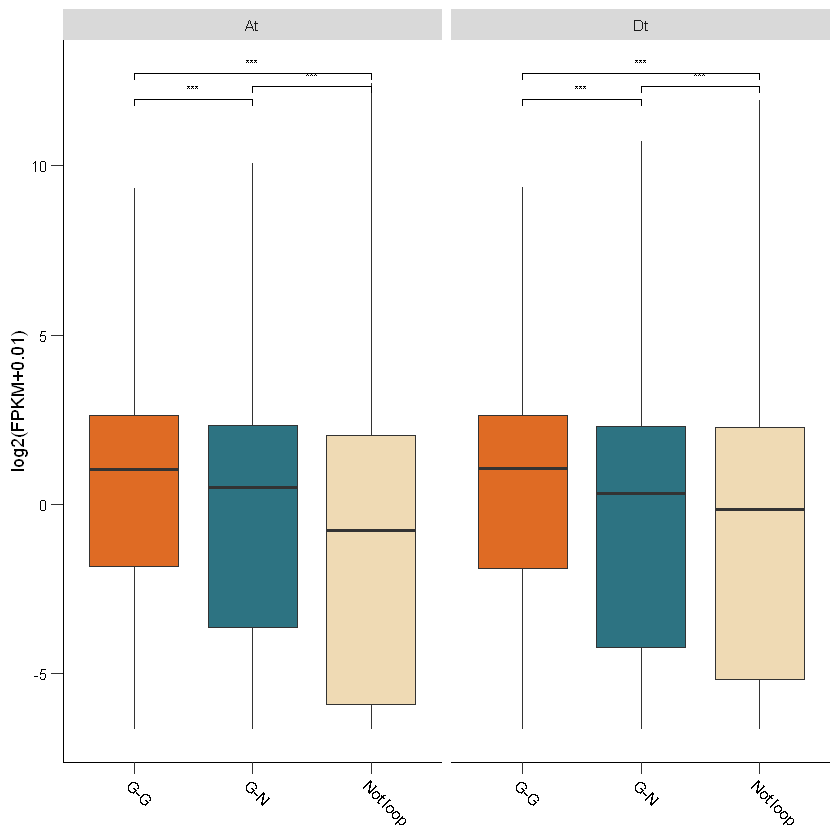

In [11]:
## 分析不同类型的loop对于基因表达的影响
rm(list = ls())
setwd("H:/TM-1_leaf_3D-genome/HiC/loop/loop_3k/gene/loop_type")
library(ggplot2)
library(ggpubr)
df <- read.csv("three_loop_gene.txt", sep = "\t", header = T)
compaired <- list(c("G-G", "G-N"), c("G-N", "Not loop"), c("G-G", "Not loop"))
# df <- within(df, sig <- factor(sig, levels = c("Not loop", "G-N", "G-G")))
# with(df, levels(sig))
#fg <- ggplot(df, aes(x = log2(FPKM + 0.01), y = sig, fill = sig)) +
fg <- ggplot(df, aes(x = tags, y = log2(FPKM + 0.01), fill = tags)) +
geom_boxplot(outlier.colour = NA, notch = FALSE) +
facet_grid(.~subg) +
labs(y = "log2(FPKM+0.01)", x = NULL) +
theme(panel.background = element_blank(),
     panel.grid = element_blank(),
     axis.line = element_line(linetype = 1),
     legend.position = "none",
     axis.ticks.length = unit(0.25, "cm"),
     axis.text = element_text(color = "black"),
     axis.text.x = element_text(angle = 315, hjust=0)
     ) +
     scale_fill_manual(values = c("#df6b24", "#2d7382", "#efdab4")) +
     geom_signif(comparisons = compaired, step_increase = 0.02,test =wilcox.test, tip_length=0.01, textsize = 2, y_position=11, annotations=c("***", "***", "***"))
fg
ggsave(plot =fg, filename = 'three_loop_gene.pdf', height =4, width = 3.5)

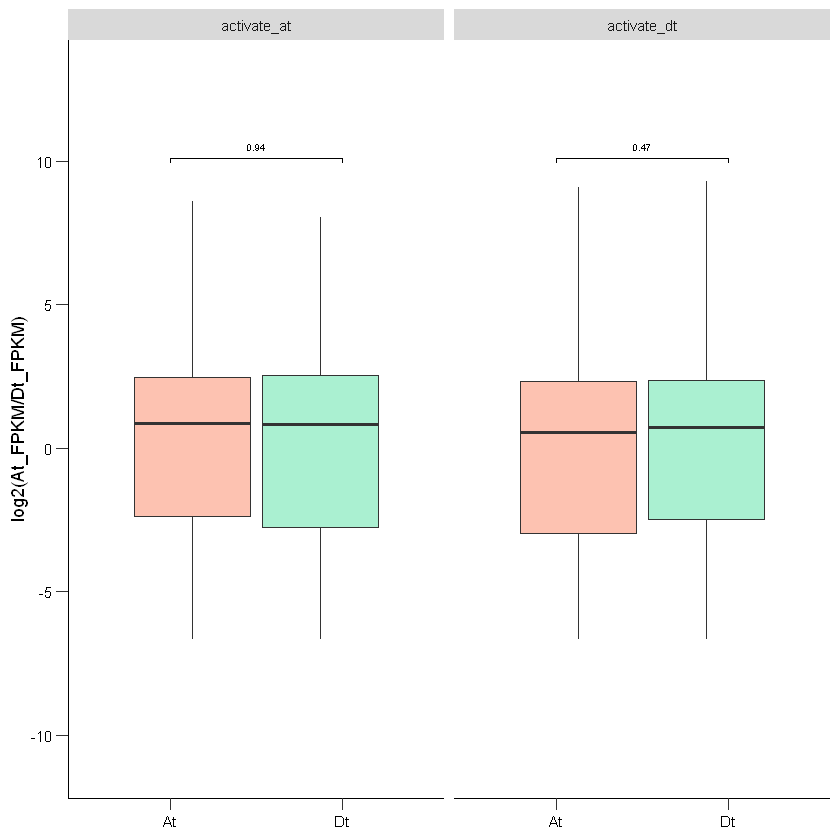

In [7]:
## 同源基因表达差异，染色体内和染色体间的比较
##比较J85和J98网络中保守的和动态的基因表达量
rm(list = ls())
setwd('G:/TM-1_leaf_3D-genome/HiC/loop/loop_3k/CREs/homo_gene_cres/diff_cres')
library(ggplot2)
library(ggpubr)
compaired <- list(c('At','Dt'))
df <- read.csv('diff_cres_gene_fpkm.txt', sep = '\t', header = T)
fg <- ggplot(df, aes(x=subg, y=log2(fpkm+0.01), fill=subg))+
geom_boxplot(outlier.colour = NA, notch=FALSE, width=1.5)+
labs(x=NULL, y='log2(At_FPKM/Dt_FPKM)')+
facet_grid(.~tags)+
coord_cartesian(ylim = c(-11, 13)) +
theme(panel.background = element_blank(), 
     panel.grid = element_blank(),
     axis.line=element_line(linetype=1,color="black"),
     legend.position='none',
     axis.ticks.length = unit(0.25, 'cm'),
     axis.text = element_text(color='black'),
     #axis.text.x = element_text(angle = 315, hjust = 0),
     )+
geom_signif(comparisons = compaired, step_increase = 0.05,test =t.test, tip_length=0.01, textsize = 2)+
scale_fill_manual(values=c('#FDC2B1', "#AAF0D1"))
fg
#ggsave(plot =fg, filename = 'gene_loop_bias_tags.pdf', height =2, width = 3)

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


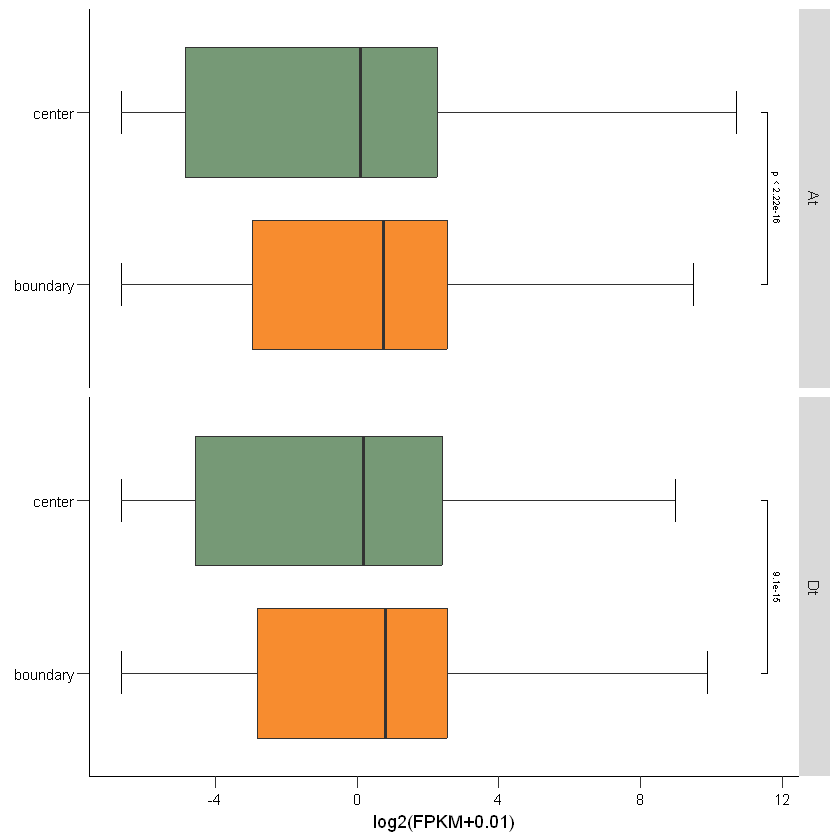

In [14]:
## 分析TAD 内部和TAD 边界出基因的表达水平
rm(list = ls())
setwd('G:/Billfish/TM-1_leaf_3D-genome/HiC/TAD')
library(ggplot2)
library(ggpubr)
compaired <- list(c('boundary','center'))
df <- read.csv('TAD_boundary_center_gene.txt', sep = '\t', header = T)
fg <- ggplot(df, aes(x=tags, y=log2(FPKM+0.01), fill=tags))+
stat_boxplot(geom = "errorbar",width=0.25)+
geom_boxplot(outlier.colour = NA, notch=FALSE)+
labs(x=NULL, y='log2(FPKM+0.01)')+
facet_grid(subg~.)+
coord_cartesian(ylim = c(-11, 13)) +
theme(panel.background = element_blank(), 
     panel.grid = element_blank(),
     axis.line=element_line(linetype=1,color="black"),
     legend.position='none',
     axis.ticks.length = unit(0.25, 'cm'),
     axis.text = element_text(color='black'),
     #axis.text.x = element_text(angle = 315, hjust = 0),
     )+
geom_signif(comparisons = compaired, step_increase = 0.05,test =t.test, tip_length=0.01, textsize = 2)+
scale_fill_manual(values=c('#F78C2F', "#769976"))+
coord_flip()
fg
ggsave(plot =fg, filename = 'TAD_boundary_center_gene.pdf', height =2, width = 3)